<a href="https://colab.research.google.com/github/thanhchi514/AI/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape


(50000, 32, 32, 3)

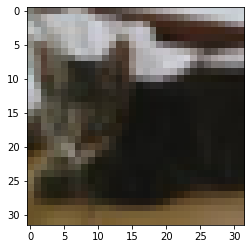

In [19]:
hinh = x_train[9]
plt.imshow(hinh, cmap=plt.cm.binary)
plt.show()

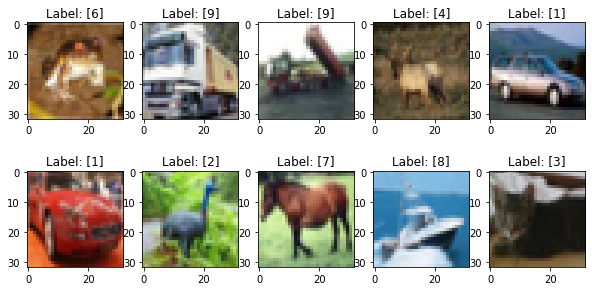

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i in range(10):
    row = i // 5
    col = i % 5
    ax[row][col].imshow(x_train[i])
    ax[row][col].set_title('Label: {}'.format(y_train[i]))
plt.show()

In [21]:
model = Sequential()
model.add(Dense(512, input_shape=(32*32*3,), activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               1573376   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [22]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train.reshape((50000, 32*32*3)), y_train, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(x_test.reshape((10000, 32*32*3)), y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/10
391/391 [==============================] - 16s 39ms/step - loss: 2.0555 - accuracy: 0.2608
Epoch 2/10
391/391 [==============================] - 15s 39ms/step - loss: 1.8850 - accuracy: 0.3326
Epoch 3/10
391/391 [==============================] - 14s 37ms/step - loss: 1.8240 - accuracy: 0.3558
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 1.7778 - accuracy: 0.3712
Epoch 5/10
391/391 [==============================] - 14s 35ms/step - loss: 1.7383 - accuracy: 0.3854
Epoch 6/10
391/391 [==============================] - 14s 36ms/step - loss: 1.7026 - accuracy: 0.3994
Epoch 7/10
391/391 [==============================] - 15s 39ms/step - loss: 1.6742 - accuracy: 0.4108
Epoch 8/10
391/391 [==============================] - 14s 37ms/step - loss: 1.6468 - accuracy: 0.4207
Epoch 9/10
391/391 [==============================] - 14s 36ms/step - loss: 1.6241 - accuracy: 0.4294
Epoch 10/10
313/313 [==============================] - 3s 9ms/step - loss: 1.5918 